#Setup Section (install packages and load data)

In [1]:
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.2 MB/s eta 0:00:00


In [2]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/4. TBATS

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/4. TBATS


In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('daily-footfall.csv', index_col="WeekBeginning")

In [5]:
# Need to switch the format of the 'WeekBeginning' index column
data.index = pd.to_datetime(data.index,
                            format = '%d/%m/%Y')

In [6]:
#Set Index Frequency of the Table to Weekly
data = data.asfreq('W')
data.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=104, freq='W-SUN')

<Axes: xlabel='WeekBeginning'>

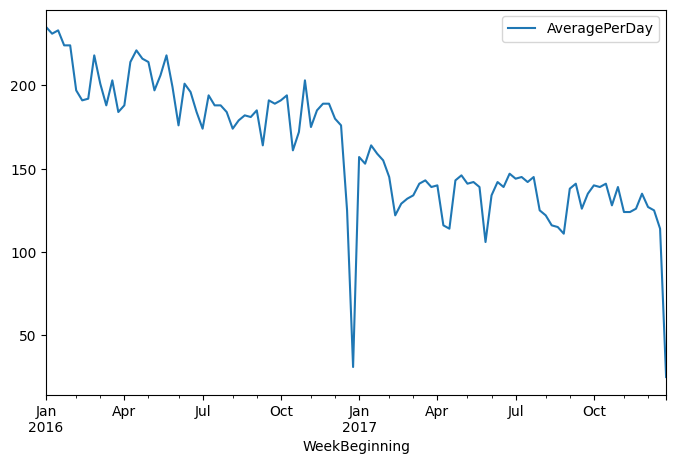

In [10]:
#Look at the Data in Graph form
data.plot(figsize=(8,5))

In [9]:
#Fill in Missing Data with ffill
data = data.fillna(method = 'ffill')

#Create the Training and Test Set

In [12]:
#Specify Training and Test Set
test_range = 5
training_set = data.iloc[:-test_range, :]
test_set = data.iloc[-test_range:, :]

#TBATS Forecasting

In [11]:
#Load TBATS library
from tbats import TBATS

In [13]:
#TBATS model, specify 52 weeks in a year
model = TBATS(seasonal_periods = [52]).fit(training_set.AveragePerDay)

In [14]:
#predictions
predictions = pd.Series(model.forecast(steps = test_range)).rename('TBATS')
predictions.index = test_set.index
predictions.head(2)

WeekBeginning
2017-11-26    142.421047
2017-12-03    149.637739
Freq: W-SUN, Name: TBATS, dtype: float64

<Axes: xlabel='WeekBeginning'>

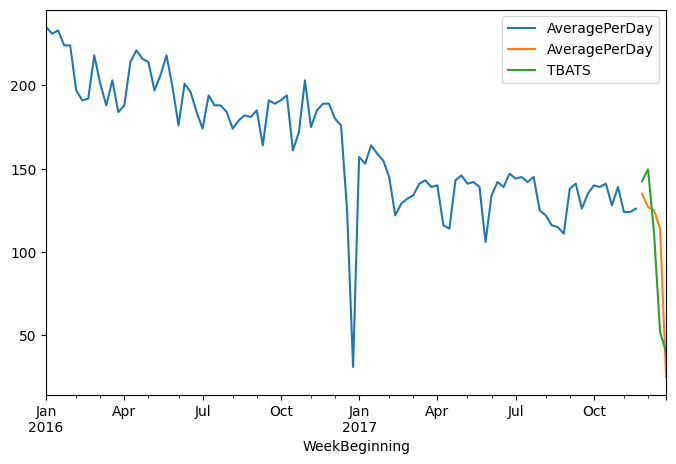

In [15]:
#Visualize the sets and predictions
training_set.AveragePerDay.plot(figsize = (8,5), legend = True)
test_set.AveragePerDay.plot(legend = True)
predictions.plot(legend = True)

#Model Assestment

In [16]:
#MAE AND RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(round(mean_absolute_error(test_set.AveragePerDay, predictions), 0))
print(round(np.sqrt(mean_squared_error(test_set.AveragePerDay, predictions)), 0))

24.0
31.0


In [17]:
#MAPE Function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) *100

MAPE(test_set.AveragePerDay, predictions)

29.6593871913867